In [1]:
!pip install qiskit;

  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 6.5 MB 4.2 MB/s            
     |████████████████████████████████| 18.0 MB 39.0 MB/s            
     |████████████████████████████████| 238 kB 40.1 MB/s            
     |████████████████████████████████| 200 kB 46.4 MB/s            
     |████████████████████████████████| 1.6 MB 41.1 MB/s            
     |████████████████████████████████| 37.5 MB 42.0 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 49 kB 3.6 MB/s             
     |████████████████████████████████| 943 kB 51.8 MB/s            
  Created wheel for qiskit: filename=qiskit-0.34.2-py3-none-any.whl size=11805 sha256=a3cb037d519921aef1e87749aa99725340ff624dc9b4cab929edff09adc98c8e
  Stored in directory: /root/.cache/pip/wheels/62/77/65/cda6eedfdd2a525bd3f479a4386930ae3088a1eb01f8c944ed
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24

In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [3]:
circuit = QuantumCircuit(2, 2)

In [4]:
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])

In [5]:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [6]:
simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)

{'00': 502, '11': 498}


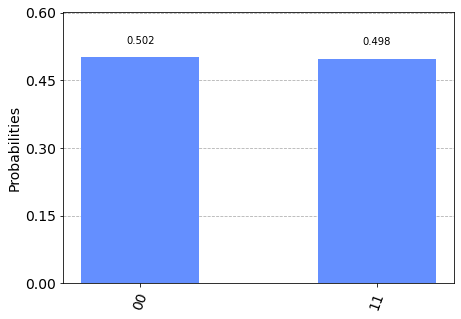

In [7]:
plot_histogram(counts)